1.Sex / Race of the Applicants against Mortgage Approvals.We'll know whether one genger or race is preferred over the other or not. 
2.Type of loan against Mortgage Approvals.
  Many loans are insured or guaranteed by government programs offered by Federal Housing Administration (FHA), the Department of Veterans Affairs (VA), or the Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA). All other loans are classified as conventional.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_data = pd.read_csv('/Users/andrewnelson/Documents/ISDS7070/Module 5 /Washington_State_HDMA-2016.csv', low_memory = False)
df_data.head(5)

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [3]:
df_data.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,465951.000000,8638.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,4.665660e+05,465960.000000,466566.0,466566.000000
mean,106.906157,2.120028,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1.126340e+05,1395.489104,2016.0,0.207285
std,29.280418,1.113000,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2.020830e+05,2950.970895,0.0,0.609593
min,14.050000,1.500000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.000000
25%,87.260002,1.590000,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,5.121000e+03,117.010000,2016.0,0.000000
50%,104.529999,1.720000,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,2.647200e+04,323.220000,2016.0,0.000000
75%,123.809998,2.000000,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,1.095258e+05,702.030000,2016.0,0.000000
max,257.140015,13.660000,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,1.241780e+06,9901.000000,2016.0,2.000000


In [4]:
df_data['action_taken_name'].value_counts()

Loan originated                                        263712
Application denied by financial institution             64177
Application withdrawn by applicant                      60358
Loan purchased by the institution                       48356
File closed for incompleteness                          18176
Application approved but not accepted                   11735
Preapproval request denied by financial institution        35
Preapproval request approved but not accepted              17
Name: action_taken_name, dtype: int64

Loan originated is a widely used term in finance , it means the loan application has been approved. We will remove the rows where the applicant has withdrawn the request for loan. Loan purchased means that the lender bought the loan on a secondary market.

In [5]:
df_data=df_data[df_data['action_taken_name']!="Application withdrawn by applicant"]
df_data=df_data[df_data['action_taken_name']!='Loan purchased by the institution']
df_data.replace('Information not provided by applicant in mail, Internet, or telephone application', "Not applicable", inplace = True)
df_data.replace('No co-applicant', "Not applicable", inplace = True)

Consideraring there are too much variable in the 'action_taken_name', we will add a new feature representing approved for originated loan and not approved for everything else.

In [6]:
df_data['loan_status']=["approved" if x=="Loan originated" else "not approved" for x in df_data['action_taken_name']]

In [7]:
df_data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_status
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,NaN,NaN,NaN,NaN,Not applicable,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated,approved
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,approved
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,approved
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,NaN,NaN,NaN,NaN,Not applicable,Not applicable,National Credit Union Administration,NCUA,Loan originated,approved
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,approved


In [8]:
df_data.drop(columns=['rate_spread','population','edit_status_name','denial_reason_name_3','denial_reason_name_2','denial_reason_name_1',
                      'applicant_race_name_5','applicant_race_name_4','applicant_race_name_3','applicant_race_name_2',
                      'co_applicant_race_name_5','co_applicant_race_name_4','co_applicant_race_name_3','co_applicant_race_name_2',
                      'as_of_year'],inplace=True)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357852 entries, 0 to 466565
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           357494 non-null  float64
 1   minority_population             357497 non-null  float64
 2   number_of_owner_occupied_units  357492 non-null  float64
 3   number_of_1_to_4_family_units   357496 non-null  float64
 4   loan_amount_000s                357852 non-null  int64  
 5   hud_median_family_income        357499 non-null  float64
 6   applicant_income_000s           326472 non-null  float64
 7   state_name                      357852 non-null  object 
 8   state_abbr                      357852 non-null  object 
 9   sequence_number                 357852 non-null  int64  
 10  respondent_id                   357852 non-null  object 
 11  purchaser_type_name             357852 non-null  object 
 12  property_type_na

> ①how does the SEX against the Mortgage Approvals?

In [10]:
df_sex=pd.crosstab(df_data['applicant_sex_name'],df_data['loan_status'])
df_sex=df_sex.reset_index()

df_sex.columns=['sex','approved','not approved']

df_sex_per=df_sex[['approved','not approved']].div(df_sex.sum(axis=1), axis=0)
df_sex_per.columns=['approved_per','not_approved_per']
df_sex=df_sex.merge(df_sex_per,left_index=True,right_index=True)
df_sex

,sex,approved,not approved,approved_per,not_approved_per
0,Female,65579,24775,0.725801,0.274199
1,Male,172650,59289,0.744377,0.255623
2,Not applicable,25483,10076,0.716640,0.283360


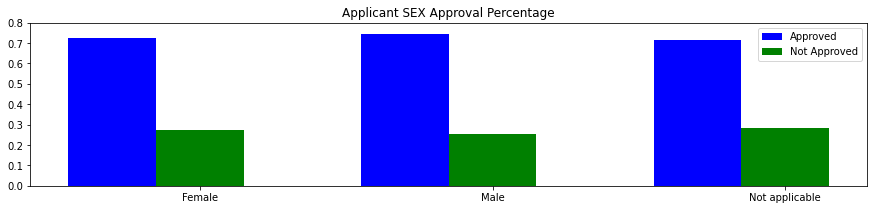

In [11]:
plt.figure(figsize=(15, 3)) 
x = list(range(3))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x,df_sex['approved_per'] ,width=width,label='Approved', fc='b')
for i in range(len(x)):
    x[i] += width
plt.bar(x, df_sex['not_approved_per'],width=width,tick_label=df_sex['sex'], label='Not Approved',fc='g')
plt.legend(loc='upper right')
plt.title('Applicant SEX Approval Percentage')
plt.ylim(0,0.8)
plt.show()

> ②how does the Applicant Race against the Mortgage Approvals?

In [12]:
df_race=pd.crosstab(df_data['applicant_race_name_1'],df_data['loan_status'])
df_race=df_race.reset_index()

df_race.columns=['race','approved','not approved']
df_race['race']=df_race['race'].replace('Native Hawaiian or Other Pacific Islander','Pacific Islande/Hawaiian')

df_race_per=df_race[['approved','not approved']].div(df_race.sum(axis=1), axis=0)
df_race_per.columns=['approved_per','not_approved_per']
df_race=df_race.merge(df_race_per,left_index=True,right_index=True)
df_race

,race,approved,not approved,approved_per,not_approved_per
0,American Indian or Alaska Native,2296,1361,0.627837,0.372163
1,Asian,22391,7967,0.737565,0.262435
2,Black or African American,5641,3102,0.645202,0.354798
3,Pacific Islande/Hawaiian,2011,976,0.673251,0.326749
4,Not applicable,38102,16032,0.703846,0.296154
5,White,193271,64702,0.749191,0.250809


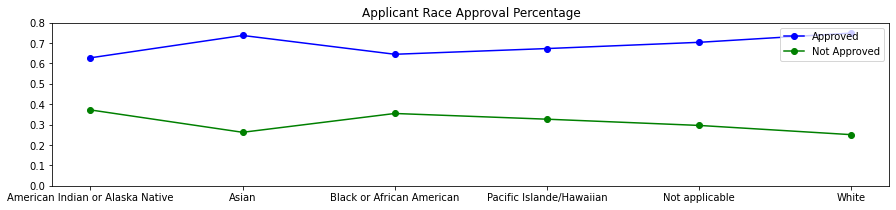

In [13]:
plt.figure(figsize=(15, 3)) 
y = list(range(6))
total_width, n = 0.8,2
width = total_width / n
plt.plot(df_race['race'],df_race['approved_per'] ,label='Approved',marker="o",color='blue')
for i in range(len(y)):
    y[i] += width
plt.plot(df_race['race'], df_race['not_approved_per'], label='Not Approved',marker="o",color='green')
plt.title('Applicant Race Approval Percentage')
plt.ylim(0,0.8)
plt.legend(loc='upper right')

> ③how does the Applicant Ethnicity against the Mortgage Approvals?

In [14]:
df_ethnicity=pd.crosstab(df_data['applicant_ethnicity_name'],df_data['loan_status'])
df_ethnicity=df_ethnicity.reset_index()

df_ethnicity.columns=['ethnicity','approved','not approved']

df_ethnicity_per=df_ethnicity[['approved','not approved']].div(df_ethnicity.sum(axis=1), axis=0)
df_ethnicity_per.columns=['approved_per','not_approved_per']
df_ethnicity=df_ethnicity.merge(df_ethnicity_per,left_index=True,right_index=True)
df_ethnicity

,ethnicity,approved,not approved,approved_per,not_approved_per
0,Hispanic or Latino,12490,6072,0.672880,0.327120
1,Not Hispanic or Latino,213779,73019,0.745399,0.254601
2,Not applicable,37443,15049,0.713309,0.286691


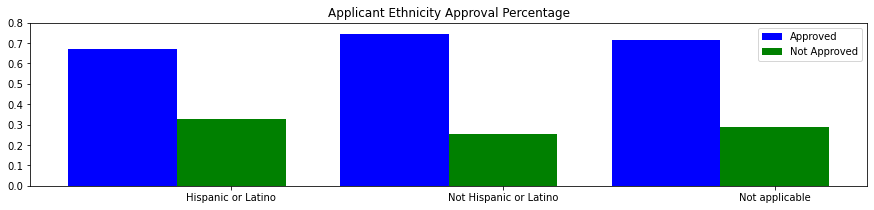

In [15]:
plt.figure(figsize=(15, 3)) 
m = list(range(3))
total_width, n = 0.8,2
width = total_width / n
plt.bar(m,df_ethnicity['approved_per'] ,width=width,label='Approved', fc='b')
for i in range(len(m)):
    m[i] += width
plt.bar(m, df_ethnicity['not_approved_per'],width=width,tick_label=df_ethnicity['ethnicity'], label='Not Approved',fc='g')
plt.title('Applicant Ethnicity Approval Percentage')
plt.ylim(0,0.8)
plt.legend(loc='upper right')

Acoording to the 3 pictures above, there is no obvious difference between female and male applicant. However, it seems that the Approved Percentage 
on 'Not Hispannic or Latino', 'White' and 'Aisan' are slightly higher than other columns.

④Does the applicant income and loan amount will affect the approved rate?

<AxesSubplot:xlabel='loan_amount_000s', ylabel='applicant_income_000s'>

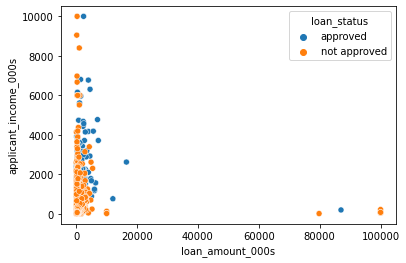

In [16]:
sns.scatterplot(x="loan_amount_000s", y="applicant_income_000s", hue="loan_status",data=df_data)

<AxesSubplot:xlabel='loan_amount_000s', ylabel='applicant_income_000s'>

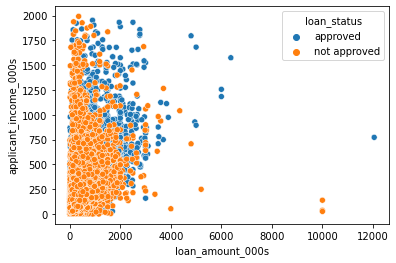

In [17]:
df_data=df_data[df_data['loan_amount_000s']<20000]
df_data=df_data[df_data['applicant_income_000s']<2000]
sns.scatterplot(x="loan_amount_000s", y="applicant_income_000s", hue="loan_status",data=df_data)

In [18]:
#df_data['income/loan percentage']=df_data['applicant_income_000s']*100/df_data['hud_median_family_income']
df_data['income<1000'] = np.where(df_data['applicant_income_000s']<1000, True, False)
df_data['loan_amount<2000'] = np.where(df_data['loan_amount_000s']<2000, True, False)

In [19]:
#df_data.dropna(subset=['income/loan percentage'], axis=0, inplace=True)

It's amazing that a person with a low income gets a loan for a very large amount. But this is a intenseive area in the bottom-right are. We'll find the applicant under 1000 are with high rate of Not Approved. So I'll divide the applicant income as under 1000 and more than 1000.And devide loan_amount as under 2000 and more than 2000.

 ⑤how does the Loan Type against the Mortgage Approvals?

In [20]:
df_loantype=pd.crosstab(df_data['loan_type_name'],df_data['loan_status'])
df_loantype=df_loantype.reset_index()

df_loantype.columns=['loan_type','approved','not approved']

df_loantype_per=df_loantype[['approved','not approved']].div(df_loantype.sum(axis=1), axis=0)
df_loantype_per.columns=['approved_per','not_approved_per']
df_loantype=df_loantype.merge(df_loantype_per,left_index=True,right_index=True)
df_loantype

,loan_type,approved,not approved,approved_per,not_approved_per
0,Conventional,189202,66091,0.741117,0.258883
1,FHA-insured,26918,10900,0.711777,0.288223
2,FSA/RHS-guaranteed,2005,524,0.792803,0.207197
3,VA-guaranteed,22993,7674,0.749764,0.250236


<function matplotlib.pyplot.show(close=None, block=None)>

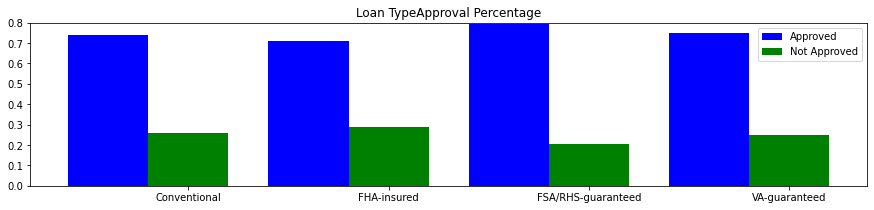

In [21]:
plt.figure(figsize=(15, 3)) 
a = list(range(4))
total_width, n = 0.8,2
width = total_width / n
plt.bar(a,df_loantype['approved_per'] ,width=width,label='Approved', fc='b')
for i in range(len(a)):
    a[i] += width
plt.bar(a, df_loantype['not_approved_per'],width=width,tick_label=df_loantype['loan_type'], label='Not Approved',fc='g')
plt.title('Loan TypeApproval Percentage')
plt.legend(loc='upper right')
plt.ylim(0,0.8)
plt.show

The FHA insured has lower approved rate than others

⑥how does the Loan Purpose against the Mortgage Approvals?

In [22]:
df_purpose=pd.crosstab(df_data['loan_purpose_name'],df_data['loan_status'])
df_purpose=df_purpose.reset_index()

df_purpose.columns=['purpose','approved','not approved']

df_purpose_per=df_purpose[['approved','not approved']].div(df_purpose.sum(axis=1), axis=0)
df_purpose_per.columns=['approved_per','not_approved_per']
df_purpose=df_purpose.merge(df_purpose_per,left_index=True,right_index=True)
df_purpose

,purpose,approved,not approved,approved_per,not_approved_per
0,Home improvement,13535,6523,0.674793,0.325207
1,Home purchase,119735,21688,0.846644,0.153356
2,Refinancing,107848,56978,0.654314,0.345686


<function matplotlib.pyplot.show(close=None, block=None)>

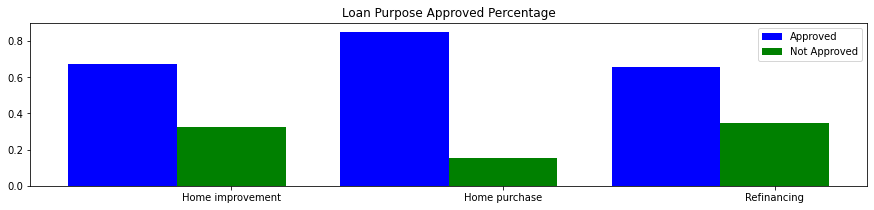

In [23]:
plt.figure(figsize=(15, 3)) 
plt.bar(x,df_purpose['approved_per'] ,width=width,label='Approved', fc='b')
for i in range(len(x)):
    x[i] += width
plt.bar(x, df_purpose['not_approved_per'],width=width,tick_label=df_purpose['purpose'], label='Not Approved',fc='g')
plt.title('Loan Purpose Approved Percentage')
plt.legend(loc='upper right')
plt.ylim(0,0.9)
plt.show

The purpose of home purchase has higher approved rate than others

⑦The property type should you apply for

In [24]:
df_property=pd.crosstab(df_data['property_type_name'],df_data['loan_status'])
df_property=df_property.reset_index()

df_property.columns=['property type','approved','not approved']

df_property_per=df_property[['approved','not approved']].div(df_property.sum(axis=1), axis=0)
df_property_per.columns=['approved_per','not_approved_per']
df_property=df_property.merge(df_property_per,left_index=True,right_index=True)
df_property


,property type,approved,not approved,approved_per,not_approved_per
0,Manufactured housing,6004,3841,0.609853,0.390147
1,One-to-four family dwelling (other than manufa...,235114,81348,0.742945,0.257055


<function matplotlib.pyplot.show(close=None, block=None)>

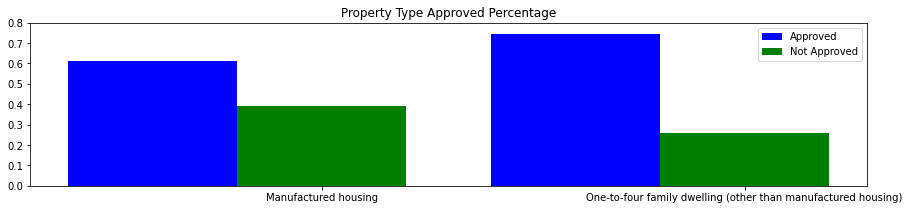

In [25]:
plt.figure(figsize=(15, 3)) 
b = list(range(2))
plt.bar(b,df_property['approved_per'] ,width=width,label='Approved', fc='b')
for i in range(len(b)):
    b[i] += width
plt.bar(b, df_property['not_approved_per'],width=width,tick_label=df_property['property type'], label='Not Approved',fc='g')
plt.title('Property Type Approved Percentage')
plt.legend(loc='upper right')
plt.ylim(0,0.8)
plt.show

⑧Does the neighbourhood family income affect the chances of getting a loan?

In [26]:
df_data['hud_median_family_income_000s']=[x/1000 for x in df_data['hud_median_family_income']]

In [27]:
df_approved=df_data[df_data['loan_status']=='approved']
df_notapproved=df_data[df_data['loan_status']=='not approved']
approved_msamd_diff=df_approved.groupby('msamd_name').median()
not_approved_msamd_diff=df_notapproved.groupby('msamd_name').median()
approved_msamd_diff=approved_msamd_diff.reset_index()
not_approved_msamd_diff=not_approved_msamd_diff.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

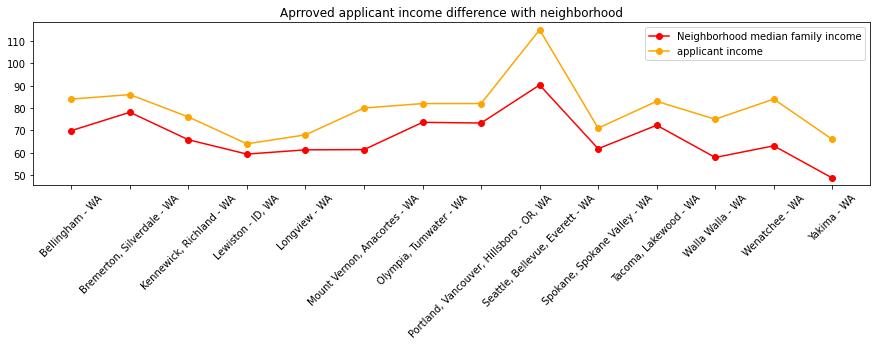

In [28]:
plt.figure(figsize=(15, 3)) 
plt.plot(approved_msamd_diff['msamd_name'],approved_msamd_diff['hud_median_family_income_000s'] ,label='Neighborhood median family income',marker="o",color='red')
plt.plot(approved_msamd_diff['msamd_name'],approved_msamd_diff['applicant_income_000s'], label='applicant income',marker="o",color='orange')
plt.title('Aprroved applicant income difference with neighborhood')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

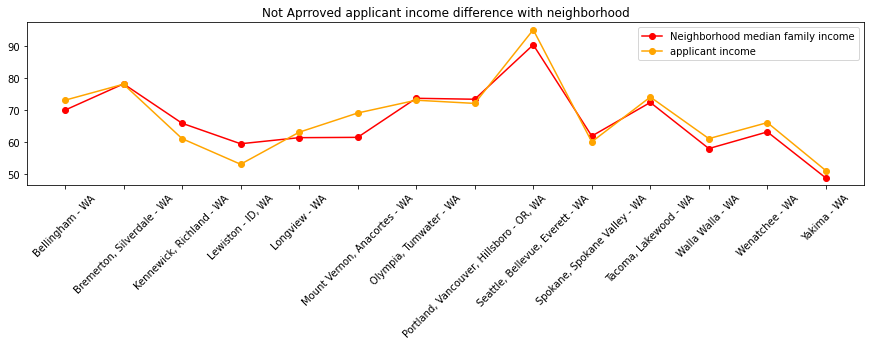

In [29]:
plt.figure(figsize=(15, 3)) 
plt.plot(not_approved_msamd_diff['msamd_name'],not_approved_msamd_diff['hud_median_family_income_000s'] ,label='Neighborhood median family income',marker="o",color='red')
plt.plot(not_approved_msamd_diff['msamd_name'],not_approved_msamd_diff['applicant_income_000s'], label='applicant income',marker="o",color='orange')
plt.title('Not Aprroved applicant income difference with neighborhood')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show

From the picture above, we find the approved applicant income is clearly higher than the neighborhood median family income. But most of the not approved applicant are lower than their neighborhood.

In [30]:
df_data['income_higher_than_neighbor'] = np.where(df_data['hud_median_family_income_000s']< df_data['applicant_income_000s'], True, False)

After find the relevant varables, dop the unuesful columns and transform all variables into numerical variables¶

In [31]:
df_data.drop(columns=['tract_to_msamd_income','minority_population','number_of_owner_occupied_units','number_of_1_to_4_family_units','loan_amount_000s','hud_median_family_income',
                  'applicant_income_000s','state_name','state_abbr','sequence_number','respondent_id','purchaser_type_name','preapproval_name', 'msamd_name', 'lien_status_name', 'hoepa_status_name',
       'county_name', 'co_applicant_sex_name', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number','hud_median_family_income_000s',
       'application_date_indicator', 'agency_name','action_taken_name',
       'agency_abbr'],inplace=True)
df_data.columns

Index(['property_type_name', 'owner_occupancy_name', 'loan_type_name',
       'loan_purpose_name', 'applicant_sex_name', 'applicant_race_name_1',
       'applicant_ethnicity_name', 'loan_status', 'income<1000',
       'loan_amount<2000', 'income_higher_than_neighbor'],
      dtype='object')

In [32]:
df_data.head()

,property_type_name,owner_occupancy_name,loan_type_name,loan_purpose_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,loan_status,income<1000,loan_amount<2000,income_higher_than_neighbor
0,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Conventional,Refinancing,Female,Not applicable,Not Hispanic or Latino,approved,True,True,True
1,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,FHA-insured,Home purchase,Male,White,Hispanic or Latino,approved,True,True,False
2,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Conventional,Refinancing,Male,White,Not Hispanic or Latino,approved,True,True,True
3,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Conventional,Refinancing,Male,Not applicable,Not applicable,approved,True,True,True
4,One-to-four family dwelling (other than manufa...,Owner-occupied as a principal dwelling,Conventional,Home improvement,Female,White,Not Hispanic or Latino,approved,True,True,True


In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326307 entries, 0 to 466565
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   property_type_name           326307 non-null  object
 1   owner_occupancy_name         326307 non-null  object
 2   loan_type_name               326307 non-null  object
 3   loan_purpose_name            326307 non-null  object
 4   applicant_sex_name           326307 non-null  object
 5   applicant_race_name_1        326307 non-null  object
 6   applicant_ethnicity_name     326307 non-null  object
 7   loan_status                  326307 non-null  object
 8   income<1000                  326307 non-null  bool  
 9   loan_amount<2000             326307 non-null  bool  
 10  income_higher_than_neighbor  326307 non-null  bool  
dtypes: bool(3), object(8)
memory usage: 23.3+ MB


In [34]:
df = pd.get_dummies(df_data)
df.head()

,income<1000,loan_amount<2000,income_higher_than_neighbor,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),owner_occupancy_name_Not applicable,owner_occupancy_name_Not owner-occupied as a principal dwelling,owner_occupancy_name_Owner-occupied as a principal dwelling,loan_type_name_Conventional,loan_type_name_FHA-insured,...,applicant_race_name_1_Asian,applicant_race_name_1_Black or African American,applicant_race_name_1_Native Hawaiian or Other Pacific Islander,applicant_race_name_1_Not applicable,applicant_race_name_1_White,applicant_ethnicity_name_Hispanic or Latino,applicant_ethnicity_name_Not Hispanic or Latino,applicant_ethnicity_name_Not applicable,loan_status_approved,loan_status_not approved
0,True,True,True,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,True,True,False,0,1,0,0,1,0,1,...,0,0,0,0,1,1,0,0,1,0
2,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0
3,True,True,True,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
4,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,0


In [35]:
df.drop(columns=['loan_status_not approved'],inplace=True)
df.head()

,income<1000,loan_amount<2000,income_higher_than_neighbor,property_type_name_Manufactured housing,property_type_name_One-to-four family dwelling (other than manufactured housing),owner_occupancy_name_Not applicable,owner_occupancy_name_Not owner-occupied as a principal dwelling,owner_occupancy_name_Owner-occupied as a principal dwelling,loan_type_name_Conventional,loan_type_name_FHA-insured,...,applicant_race_name_1_American Indian or Alaska Native,applicant_race_name_1_Asian,applicant_race_name_1_Black or African American,applicant_race_name_1_Native Hawaiian or Other Pacific Islander,applicant_race_name_1_Not applicable,applicant_race_name_1_White,applicant_ethnicity_name_Hispanic or Latino,applicant_ethnicity_name_Not Hispanic or Latino,applicant_ethnicity_name_Not applicable,loan_status_approved
0,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
1,True,True,False,0,1,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,1
2,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
3,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
4,True,True,True,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1


In [36]:
X=df.drop(['loan_status_approved'], axis=1)
Y=df['loan_status_approved']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=9)

In [38]:
clf = tree.DecisionTreeClassifier(max_depth=11)

# Train our model 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [39]:
y_pred = clf.predict(X_test)
print(sum(y_pred==y_test))

80395


In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.12      0.20     28000
           1       0.76      0.97      0.85     79682

    accuracy                           0.75    107682
   macro avg       0.66      0.54      0.53    107682
weighted avg       0.71      0.75      0.68    107682



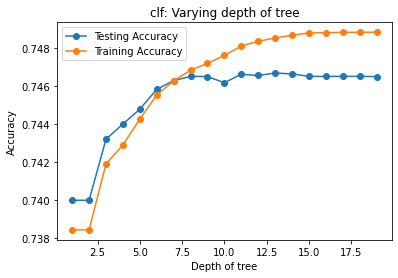

In [41]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 20)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy',marker="o")
plt.plot(dep, train_accuracy, label = 'Training Accuracy',marker="o")
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

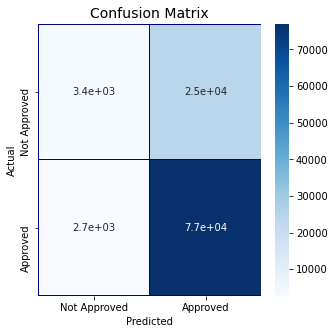

In [42]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=9,n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=9)

In [44]:
y_pred2=model.predict(X_test)

In [45]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.12      0.20     28000
           1       0.76      0.97      0.85     79682

    accuracy                           0.75    107682
   macro avg       0.66      0.54      0.52    107682
weighted avg       0.71      0.75      0.68    107682



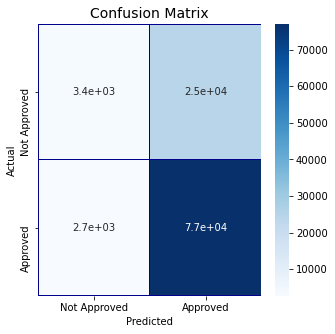

In [46]:
cm = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [47]:
from scipy import stats
rng = np.random.default_rng()
x = rng.random(10)
y = 1.6*x + rng.random(10)
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")


R-squared: 0.735405


In [48]:
Y_test = [0.54,0.08,0.13]  
Y_pred = [0.75,0.98,0.85]
MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
print(MSE)

0.4575


In [49]:
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print (r_value**2)

0.7354050745882214


In [50]:
from __future__ import print_function, division 
import sklearn.metrics 

def compute_r2_weighted(y_true, y_pred, weight):
    sse = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    tse = (weight * (y_true - np.average(
        y_true, axis=0, weights=weight)) ** 2).sum(axis=0, dtype=np.float64)
    r2_score = 1 - (sse / tse)
    return r2_score, sse, tse    

def compute_r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score = 1 - (sse / tse)
    return r2_score, sse, tse

def main():
    '''
    Demonstrate the use of compute_r2_weighted() and checks the results against sklearn
    '''        
    y_true = [3, -0.5, 2, 7]
    y_pred = [2.5, 0.0, 2, 8]
    weight = [1, 5, 1, 2]
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print('r2_score: {0}'.format(r2_score))  
    #r2_score,_,_ = compute_r2(np.array(y_true), np.array(y_pred))
    #print('r2_score: {0}'.format(r2_score))
    r2_score = sklearn.metrics.r2_score(y_true, y_pred,weight)
    print('r2_score weighted: {0}'.format(r2_score))
    #r2_score,_,_ = compute_r2_weighted(np.array(y_true), np.array(y_pred), np.array(weight))
    #print('r2_score weighted: {0}'.format(r2_score))

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

r2_score: 0.9486081370449679
r2_score weighted: 0.9573170731707317


/Users/andrewnelson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass sample_weight=[1, 5, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


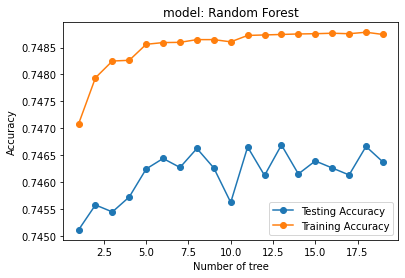

In [51]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 20)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
    # Setup a random forest Classifier with estimators
    model = RandomForestClassifier(n_estimators=k)

    # Fit the classifier to the training data
    model.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = model.score(X_test, y_test)

# Generate plot
plt.title('model: Random Forest')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy',marker="o")
plt.plot(dep, train_accuracy, label = 'Training Accuracy',marker="o")
plt.legend()
plt.xlabel('Number of tree')
plt.ylabel('Accuracy')
plt.show()